In [67]:
import astropy
from astropy.table import Table
import astropy.units as u
from astropy.coordinates import SkyCoord
import healpy as hp
from healpy.newvisufunc import projview
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

In [68]:
fn_quaia = '../data/quaia_G20.5.fits'
tab_quaia = Table.read(fn_quaia)
N_quaia = len(tab_quaia)
print(f"Number of data sources: {N_quaia}")

Number of data sources: 1295502


In [69]:
fn_erosita = '../data/eRASS1_Main.v1.1.fits'
tab_erosita = Table.read(fn_erosita)
N_erosita = len(tab_erosita)
print(f"Number of data sources: {N_erosita}")

Number of data sources: 930203


In [70]:
tab_erosita.columns

<TableColumns names=('IAUNAME','DETUID','SKYTILE','ID_SRC','UID','UID_Hard','ID_CLUSTER','RA','DEC','RA_RAW','DEC_RAW','RA_LOWERR','RA_UPERR','DEC_LOWERR','DEC_UPERR','POS_ERR','RADEC_ERR','LII','BII','ELON','ELAT','MJD','MJD_MIN','MJD_MAX','EXT','EXT_ERR','EXT_LOWERR','EXT_UPERR','EXT_LIKE','DET_LIKE_0','ML_CTS_1','ML_CTS_ERR_1','ML_CTS_LOWERR_1','ML_CTS_UPERR_1','ML_RATE_1','ML_RATE_ERR_1','ML_RATE_LOWERR_1','ML_RATE_UPERR_1','ML_FLUX_1','ML_FLUX_ERR_1','ML_FLUX_LOWERR_1','ML_FLUX_UPERR_1','ML_BKG_1','ML_EXP_1','ML_EEF_1','APE_CTS_1','APE_BKG_1','APE_EXP_1','APE_RADIUS_1','APE_POIS_1','DET_LIKE_P1','ML_CTS_P1','ML_CTS_ERR_P1','ML_CTS_LOWERR_P1','ML_CTS_UPERR_P1','ML_RATE_P1','ML_RATE_ERR_P1','ML_RATE_LOWERR_P1','ML_RATE_UPERR_P1','ML_FLUX_P1','ML_FLUX_ERR_P1','ML_FLUX_LOWERR_P1','ML_FLUX_UPERR_P1','ML_BKG_P1','ML_EXP_P1','ML_EEF_P1','APE_CTS_P1','APE_BKG_P1','APE_EXP_P1','APE_RADIUS_P1','APE_POIS_P1','DET_LIKE_P2','ML_CTS_P2','ML_CTS_ERR_P2','ML_CTS_LOWERR_P2','ML_CTS_UPERR_P2','ML_R

In [71]:
cat_quaia = SkyCoord(ra=tab_quaia['ra'], dec=tab_quaia['dec'])
cat_erosita = SkyCoord(ra=tab_erosita['RA'], dec=tab_erosita['DEC'])
idx, d2d, d3d = cat_quaia.match_to_catalog_sky(cat_erosita)

In [72]:
idx.shape, d2d.shape

((1295502,), (1295502,))

(array([ 8546., 21534., 26915., 26389., 23093., 19208., 15182., 11508.,
         8761.,  6720.,  5077.,  3991.,  3027.,  2365.,  1946.,  1583.,
         1322.,  1212.,  1030.,   950.,   886.,   816.,   764.,   752.,
          650.,   710.,   661.,   652.,   613.]),
 array([ 0.        ,  1.03448276,  2.06896552,  3.10344828,  4.13793103,
         5.17241379,  6.20689655,  7.24137931,  8.27586207,  9.31034483,
        10.34482759, 11.37931034, 12.4137931 , 13.44827586, 14.48275862,
        15.51724138, 16.55172414, 17.5862069 , 18.62068966, 19.65517241,
        20.68965517, 21.72413793, 22.75862069, 23.79310345, 24.82758621,
        25.86206897, 26.89655172, 27.93103448, 28.96551724, 30.        ]),
 <BarContainer object of 29 artists>)

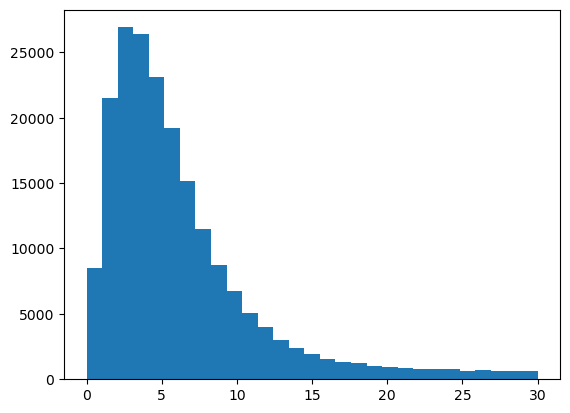

In [73]:
plt.hist(d2d.to(u.arcsec).value, bins=np.linspace(0,30,30))
#plt.yscale('log')

In [86]:
max_sep = 7.0 * u.arcsec
sep_constraint = d2d < max_sep
quaia_matches = cat_quaia[sep_constraint]
erosita_matches = cat_erosita[idx[sep_constraint]]

In [87]:
tab_x = tab_quaia[sep_constraint]

In [88]:
quaia_matches.shape, erosita_matches.shape

((137674,), (137674,))

In [89]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

cmap_map = 'plasma'
fac_stdev = 1.5

In [90]:
pixel_indices_quaia = hp.ang2pix(NSIDE, tab_quaia['ra'], tab_quaia['dec'], lonlat=True)
map_quaia = np.bincount(pixel_indices_quaia, minlength=NPIX)

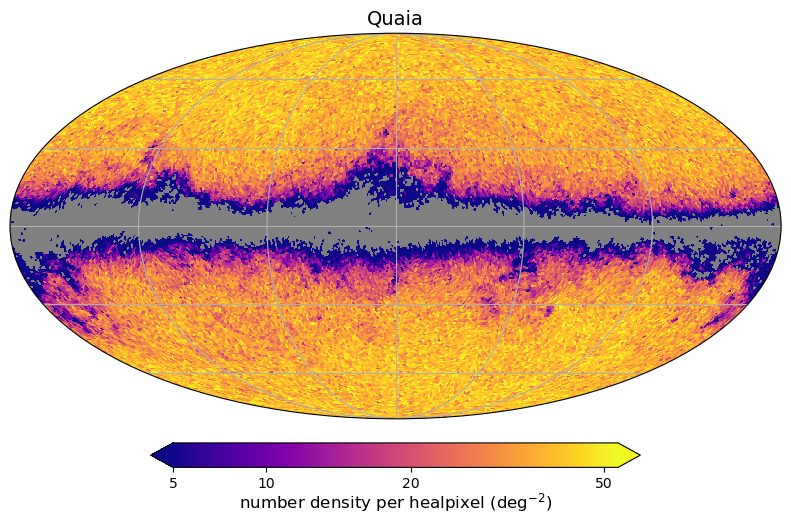

In [91]:
title_quaia = rf"Quaia"
projview(map_quaia, title=title_quaia,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_quaia)-fac_stdev*np.std(map_quaia), max=np.median(map_quaia)+fac_stdev*np.std(map_quaia), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20, 50]) 

In [92]:
pixel_indices_erosita = hp.ang2pix(NSIDE, tab_erosita['RA'], tab_erosita['DEC'], lonlat=True)
map_erosita = np.bincount(pixel_indices_erosita, minlength=NPIX)

In [93]:
np.max(map_erosita)

506

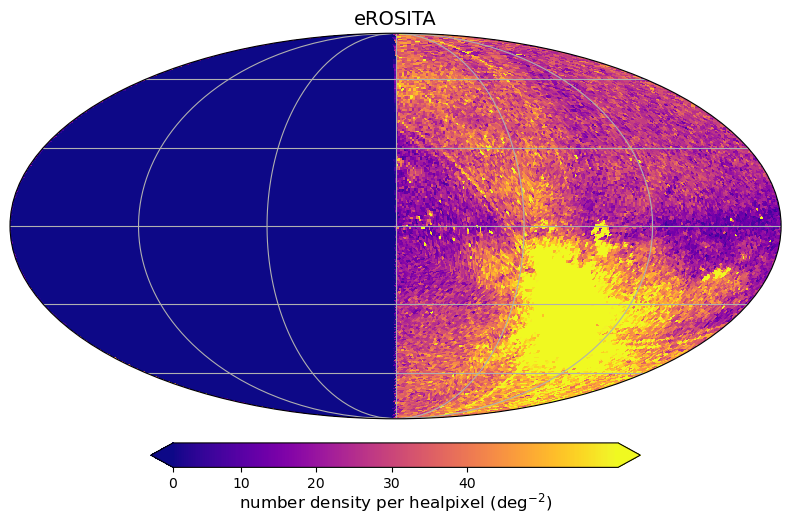

In [94]:
title_erosita = rf"eROSITA"
projview(map_erosita, title=title_erosita,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            #min=np.median(map_erosita)-fac_stdev*np.std(map_erosita), 
            min = 1,
            max= 60,
            #norm='log', 
            graticule=True,
            cbar_ticks=np.arange(0, 50, 10)
            ) 

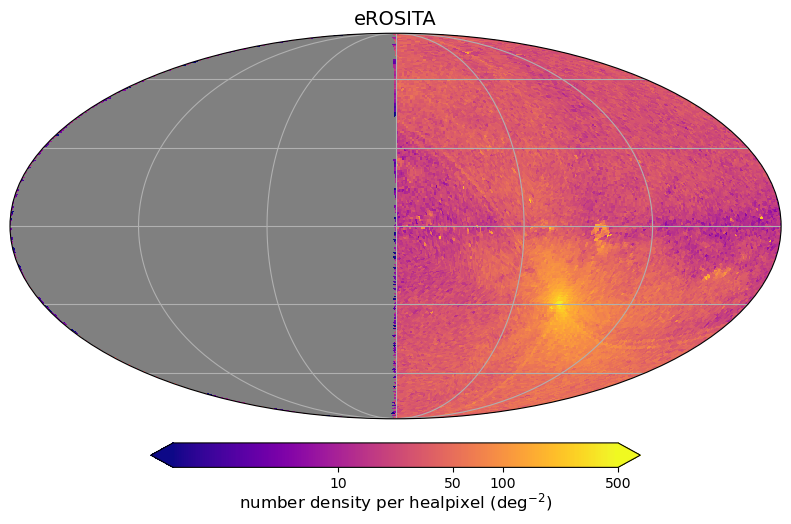

In [95]:
title_erosita = rf"eROSITA"
projview(map_erosita, title=title_erosita,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            #min=np.median(map_erosita)-fac_stdev*np.std(map_erosita), 
            min = 1,
            max = 500, 
            norm='log', graticule=True,
            cbar_ticks=[10, 50, 100, 500]
            ) 

In [96]:
pixel_indices_x = hp.ang2pix(NSIDE, tab_x['ra'], tab_x['dec'], lonlat=True)
map_x = np.bincount(pixel_indices_x, minlength=NPIX)

In [99]:
np.max(map_x)

40

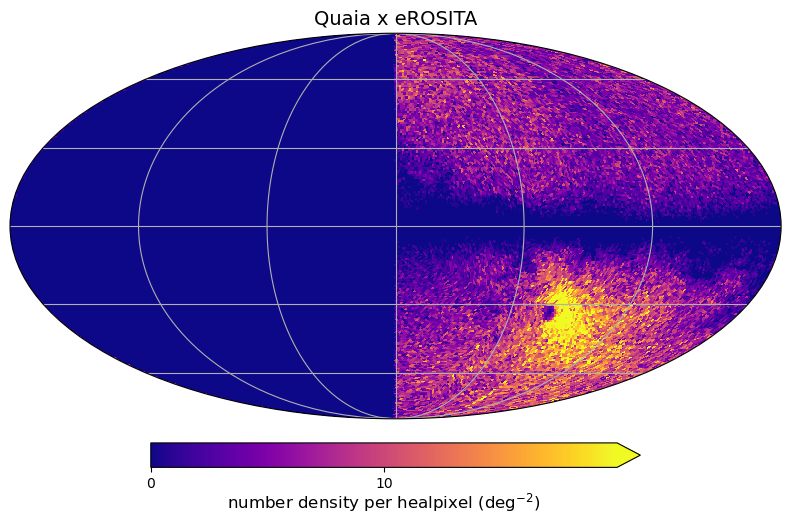

In [102]:
title_x = rf"Quaia x eROSITA"
projview(map_x, title=title_x,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            #min=np.median(map_erosita)-fac_stdev*np.std(map_erosita), 
            min = 0,
            max= 20,
            #norm='log', 
            graticule=True,
            cbar_ticks=np.arange(0, 20, 10)
            ) 